# XGBoost Classifier


### Data Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Import Data
dataset = pd.read_csv('C:/Users/Sebas/Desktop/DataSets/DataSetsPython/PracticeDSP/DataC.csv')
# Apply LabelEncoder to Class column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['Class'] = label_encoder.fit_transform(dataset['Class'])
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
# Splitting Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Training XGBoost on the Training set

In [2]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Making the Confusion Matrix

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[85  2]
 [ 1 49]]


0.9781021897810219

### Applying K-Fold Cross Validation 

In [4]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.71 %
Standard Deviation: 2.28 %


# XGBoost 2nd Classifier

### Data Preprocessing

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Import Data
dataset = pd.read_csv('C:/Users/Sebas/Desktop/DataSets/DataSetsPython/PracticeDSP/churn-bigml-80.csv')
X = dataset.iloc[:,:-1].values   #independent variables
y = dataset.iloc[:,-1].values    #Dependent variable
dataset

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


Descriptive stats

In [6]:
numeric_features = [f for f in dataset.columns if dataset.dtypes[f] not in ['object', 'bool']]
dataset[numeric_features].describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Checking for imbalanced data and types of data in each column. Also, Missing data check

In [7]:
dataset['Churn'] = dataset['Churn'].astype(int)
print(dataset['Churn'].value_counts() )   #Imbalanced Data
print(dataset.dtypes) #Types of data
print(dataset.isna().sum(axis=0)) #Missing Values check

Churn
0    2278
1     388
Name: count, dtype: int64
State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                       int64
dtype: object
State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
To

Apply LabelEncoder to object Yes/No columns

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X[:, 3] = label_encoder.fit_transform(X[:, 3])
X[:, 4] = label_encoder.fit_transform(X[:, 4])

Apply One Hot Encoder to the "State" multi-categorical column

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],
                       remainder='passthrough')
X = ct.fit_transform(X).toarray() # Transform the data and convert it back to a dense array
X = pd.DataFrame(X) # Convert the array back to a DataFrame for better readability

In [10]:
print(X)

       0    1    2    3    4    5    6    7    8    9   ...     59     60  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  197.4   99.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  195.5  103.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  121.2  110.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   61.9   88.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  148.3  122.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
2661  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  189.7   68.0   
2662  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  215.5  126.0   
2663  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  153.4   55.0   
2664  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  288.8   58.0   
2665  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  265.9   82.0   

         61     62     63     64    65   66    67   68  
0     16.78  244.7

Splitting Data

In [11]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=13,
                                                    stratify=y)

### Training XGBoost on the Training set

In [12]:
import xgboost
print(xgboost.__version__)


2.1.0


In [13]:
from xgboost import XGBClassifier
classifier = XGBClassifier(objective="binary:logistic", seed=13)
classifier.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)

[0]	validation_0-logloss:0.30196
[1]	validation_0-logloss:0.24226
[2]	validation_0-logloss:0.20777
[3]	validation_0-logloss:0.18889
[4]	validation_0-logloss:0.17483
[5]	validation_0-logloss:0.16184
[6]	validation_0-logloss:0.15334
[7]	validation_0-logloss:0.14747
[8]	validation_0-logloss:0.14385
[9]	validation_0-logloss:0.13985
[10]	validation_0-logloss:0.13641
[11]	validation_0-logloss:0.13782
[12]	validation_0-logloss:0.13448
[13]	validation_0-logloss:0.13129
[14]	validation_0-logloss:0.13247
[15]	validation_0-logloss:0.13067
[16]	validation_0-logloss:0.12972
[17]	validation_0-logloss:0.12879
[18]	validation_0-logloss:0.12879
[19]	validation_0-logloss:0.12830
[20]	validation_0-logloss:0.12870
[21]	validation_0-logloss:0.12849
[22]	validation_0-logloss:0.12560
[23]	validation_0-logloss:0.12361
[24]	validation_0-logloss:0.12318
[25]	validation_0-logloss:0.12295
[26]	validation_0-logloss:0.12163
[27]	validation_0-logloss:0.12156
[28]	validation_0-logloss:0.12141
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Grid Search

In [14]:
from sklearn.model_selection import GridSearchCV

hyper_params = {
    'max_depth': [3,4,5],
    'learning_rate': [0.1, 1, 5],
    'gamma': [0, 0.5, 1],
    'reg_lambda': [1],
    'scale_pos_weight': [1, 3, 5, (y_train.shape[0]/sum(y_train)) - 1]
}

tuned_model = GridSearchCV(
    XGBClassifier(
        objective="binary:logistic",
        seed=13
    ),
    param_grid=hyper_params,
    scoring='roc_auc',
    verbose=0,
    n_jobs=10,
    cv=5
).fit(X_train, y_train)
print(tuned_model.best_params_)

{'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 1, 'scale_pos_weight': 1}


### Training the Tunned XGBoost on the Training set

In [15]:
classifier = XGBClassifier(objective="binary:logistic", seed=13,
                           gamma=0.5,
                           learning_rate=0.1,
                           max_depth=5,
                           reg_lambda=1,
                           scale_pos_weight=1)

classifier.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)

[0]	validation_0-logloss:0.38002
[1]	validation_0-logloss:0.34439
[2]	validation_0-logloss:0.31670
[3]	validation_0-logloss:0.29307
[4]	validation_0-logloss:0.27289
[5]	validation_0-logloss:0.25620
[6]	validation_0-logloss:0.24159
[7]	validation_0-logloss:0.22872
[8]	validation_0-logloss:0.21792
[9]	validation_0-logloss:0.20835
[10]	validation_0-logloss:0.20023
[11]	validation_0-logloss:0.19249
[12]	validation_0-logloss:0.18476
[13]	validation_0-logloss:0.17795
[14]	validation_0-logloss:0.17292
[15]	validation_0-logloss:0.16886
[16]	validation_0-logloss:0.16555
[17]	validation_0-logloss:0.16236
[18]	validation_0-logloss:0.15865
[19]	validation_0-logloss:0.15592
[20]	validation_0-logloss:0.15282
[21]	validation_0-logloss:0.15057
[22]	validation_0-logloss:0.14811
[23]	validation_0-logloss:0.14640
[24]	validation_0-logloss:0.14546
[25]	validation_0-logloss:0.14443
[26]	validation_0-logloss:0.14279
[27]	validation_0-logloss:0.14135
[28]	validation_0-logloss:0.14108
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Making the Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[451   5]
 [ 11  67]]


0.9700374531835206

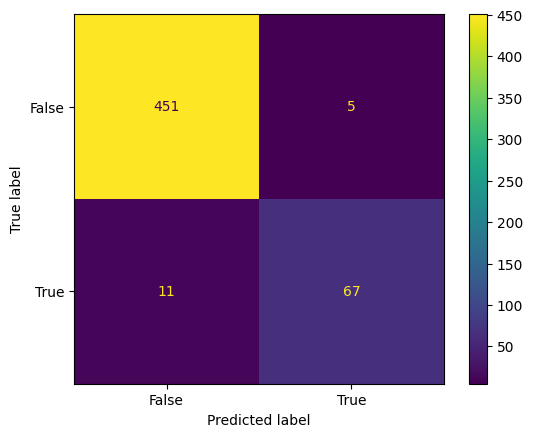

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)

Check scores


In [18]:
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, accuracy_score
def evaluate(model):
    metrics = [balanced_accuracy_score, roc_auc_score, accuracy_score]
    predicts = model.predict(X_test)

    print('\t'.join([m.__name__ for m in metrics]))
    for scoring in metrics:
        print(f'{scoring(y_test, predicts):.3f}\t\t\t', end="")

In [19]:
evaluate(classifier)

balanced_accuracy_score	roc_auc_score	accuracy_score
0.924			0.924			0.970			

### Applying K-Fold Cross Validation 

In [20]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.22 %
Standard Deviation: 0.86 %
